In [27]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
bank_data = pd.read_csv("./bank/bank-full.csv", sep=";")

In [3]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank_data.shape

(45211, 17)

In [7]:
bank_data['index'] = pd.Series(range(45211))

In [11]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,4


In [9]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,45206
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,45207
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,45208
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,45209
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no,45210


In [14]:
bank_data['pdays'] = bank_data['pdays'].replace({-1: np.NaN})

In [15]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,4


<AxesSubplot:title={'center':'Histogram of Days Since Previous'}, ylabel='Frequency'>

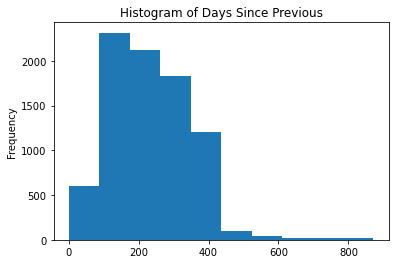

In [18]:
bank_data['pdays'].plot(kind = 'hist', title = 'Histogram of Days Since Previous')

In [20]:
bank_data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [22]:
bank_data['education_numeric'] = bank_data['education']

In [23]:
dict_edu = {"education_numeric": {"primary": 6, "secondary":12, "tertiary":16, "unknown": np.NaN}}

In [25]:
bank_data.replace(dict_edu, inplace=True)

In [26]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index,education_numeric
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,0,16.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,1,12.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,2,12.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,3,NaN
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,4,NaN


In [28]:
bank_data['age_z'] = stats.zscore(bank_data['age'])

In [29]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index,education_numeric,age_z
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,0,16.0,1.606965
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,1,12.0,0.288529
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,2,12.0,-0.747384
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,3,NaN,0.571051
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,4,NaN,-0.747384


In [30]:
bank_data.query('age_z > 3 | age_z < -3')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index,education_numeric,age_z
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,NaN,0,unknown,no,29158,6.0,3.961314
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,NaN,0,unknown,no,29261,6.0,3.207923
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,NaN,0,unknown,no,29263,6.0,3.207923
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,NaN,0,unknown,no,29322,16.0,3.961314
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,NaN,0,unknown,yes,29865,6.0,3.207923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45109,78,management,married,unknown,no,1780,yes,no,cellular,25,oct,211,2,185.0,7,success,yes,45109,NaN,3.490445
45118,78,retired,married,primary,no,14204,no,no,cellular,26,oct,150,1,183.0,1,other,no,45118,6.0,3.490445
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185.0,3,success,no,45141,NaN,3.396271
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183.0,1,failure,yes,45191,16.0,3.207923
